In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [41]:
data = pd.read_csv(r'C:\Users\Sayantan\Desktop\internship - insaid\churn.csv')

### Getting a over-view of the data 

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

##### The data set has no null values in any of the columns

In [7]:
data = data.replace(to_replace = ['Yes','No'],value = ['1','0'])
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,0,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,...,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,...,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,1,...,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,1,1,24,1,1,DSL,1,...,1,1,1,1,One year,1,Mailed check,84.80,1990.5,0
7039,2234-XADUH,Female,0,1,1,72,1,1,Fiber optic,0,...,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.9,0
7040,4801-JZAZL,Female,0,1,1,11,0,No phone service,DSL,1,...,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,8361-LTMKD,Male,1,1,0,4,1,1,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.6,1


### Data visualization

In [8]:
count_stayed = data['Churn'] == '1'
percentage = count_stayed.mean() * 100

percentage of person staying with the company 26.536987079369588


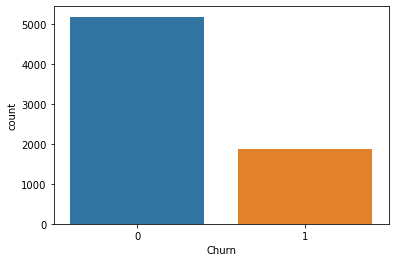

In [9]:
sns.countplot(data['Churn'])
print("percentage of person staying with the company", percentage)

##### This clearly shows that around 26 % of the customers only stayed while rest left. The number of people who left is around one third of who stayed

In [10]:
sns.pairplot

<function seaborn.axisgrid.pairplot(data, hue=None, hue_order=None, palette=None, vars=None, x_vars=None, y_vars=None, kind='scatter', diag_kind='auto', markers=None, height=2.5, aspect=1, corner=False, dropna=True, plot_kws=None, diag_kws=None, grid_kws=None, size=None)>

In [11]:
def bar_chart(feature):
    stayed = data[data['Churn']== '1'][feature].value_counts()
    left = data[data['Churn']=='0'][feature].value_counts()
    df = pd.DataFrame([stayed,left])
    df.index = ['stayed','left']
    df.plot(kind='bar',stacked=True, figsize=(10,5))
    percentage = (stayed/stayed+left)
    print("The percentage is " , percentage)

In [12]:
stayed = data[data['Churn']=='1']['gender'].value_counts()
stayed

Female    939
Male      930
Name: gender, dtype: int64

In [13]:
left = data[data['Churn']=='0']['gender'].value_counts()
left

Male      2625
Female    2549
Name: gender, dtype: int64

The percentage is  Female    2550.0
Male      2626.0
Name: gender, dtype: float64


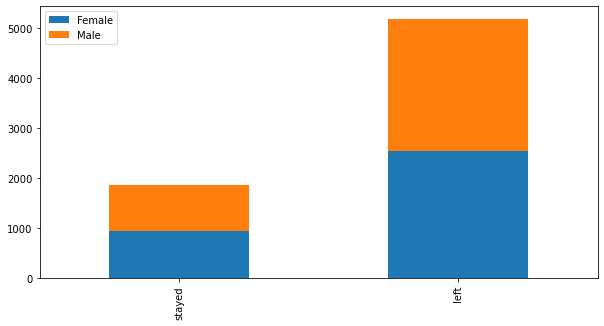

In [14]:
bar_chart('gender')

##### Gender did not play a important role in customer attrition.

The percentage is  0    4509.0
1     667.0
Name: SeniorCitizen, dtype: float64


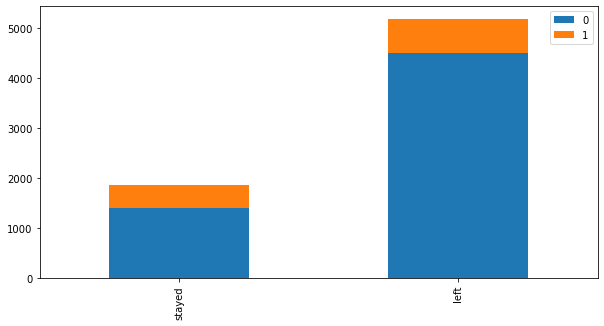

In [15]:
bar_chart('SeniorCitizen')

The percentage is  0    2442.0
1    2734.0
Name: Partner, dtype: float64


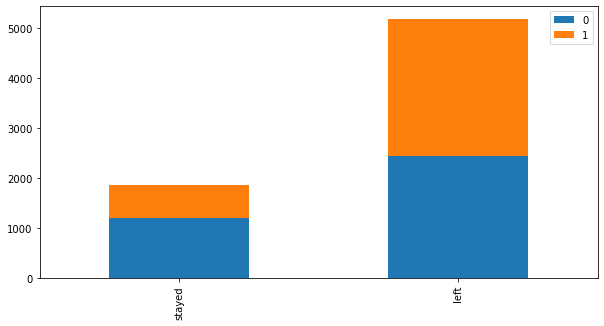

In [16]:
bar_chart('Partner')

The percentage is  0    3391.0
1    1785.0
Name: Dependents, dtype: float64


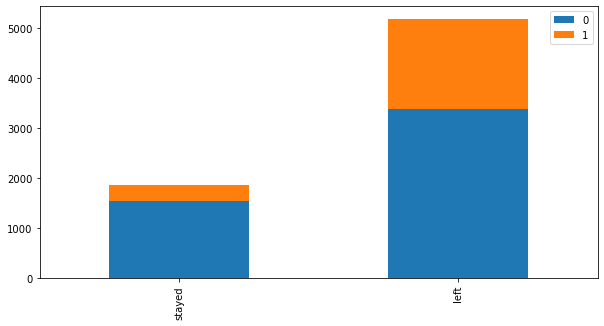

In [17]:
bar_chart('Dependents')

##### More people stayed if they were dependents in some ways

The percentage is  1    4663.0
0     513.0
Name: PhoneService, dtype: float64


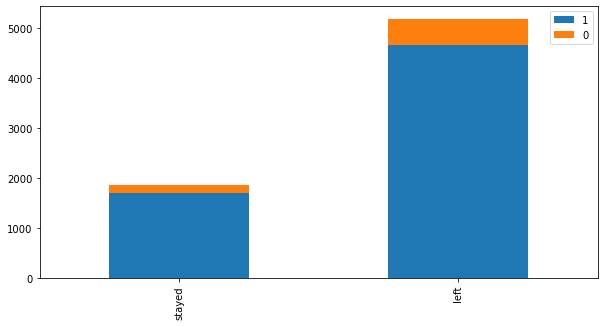

In [18]:
bar_chart('PhoneService')

##### Though many people stayed but more number of people left as well. Another observation very few people stayed without phone service.

The percentage is  0                   2542.0
1                   2122.0
No phone service     513.0
Name: MultipleLines, dtype: float64


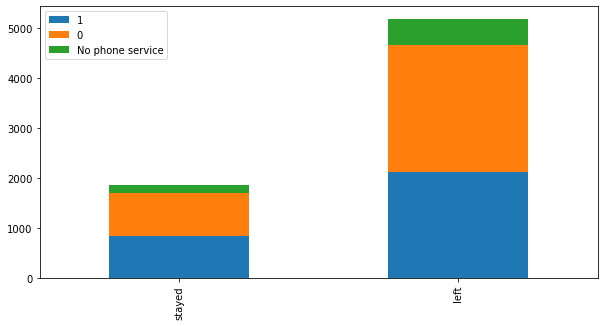

In [19]:
bar_chart('MultipleLines')

##### The data does not provide much insight and the conclusion is that more people left than stayed if multiple lines were not porvided

The percentage is  0              1414.0
DSL            1963.0
Fiber optic    1800.0
Name: InternetService, dtype: float64


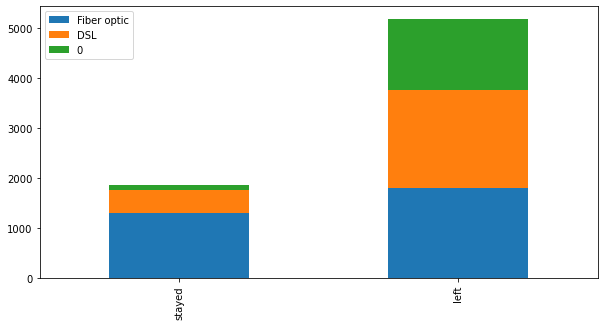

In [20]:
bar_chart('InternetService')

##### On providing fibre optic internet service more number of people stayed but on providing no internet service every customer had a tendency to leave

The percentage is  0                      2038.0
1                      1725.0
No internet service    1414.0
Name: OnlineSecurity, dtype: float64


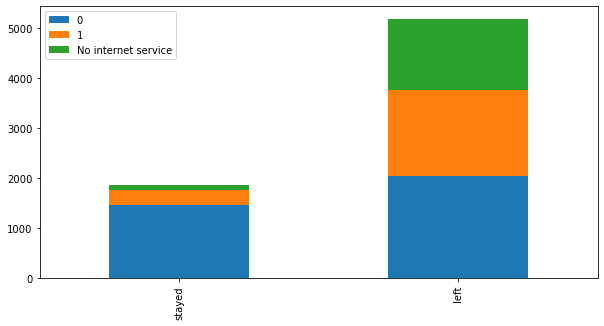

In [21]:
bar_chart('OnlineSecurity')

##### Online security is a very important for customers and a huge number of people stayed because of this.

The percentage is  0                      1856.0
1                      1907.0
No internet service    1414.0
Name: OnlineBackup, dtype: float64


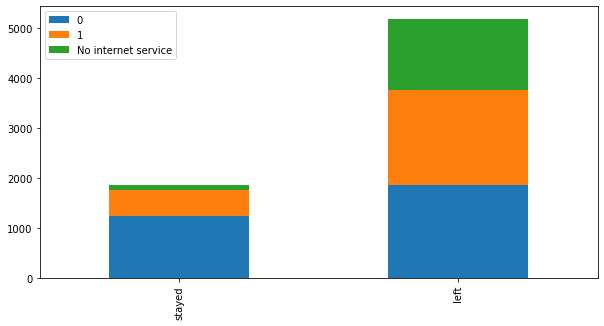

In [22]:
bar_chart('OnlineBackup')

##### Online backup played a important role in the customer attrition as well

The percentage is  0                      1885.0
1                      1878.0
No internet service    1414.0
Name: DeviceProtection, dtype: float64


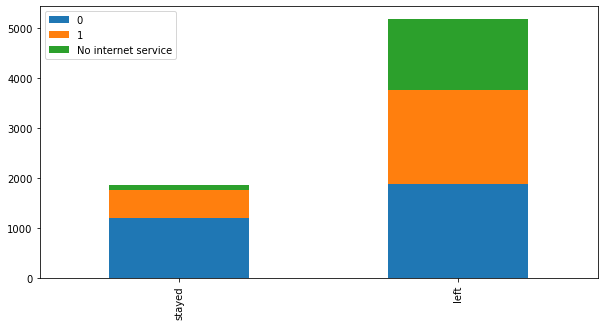

In [23]:
bar_chart('DeviceProtection')

##### More people stayed if the device protection was provided, but people left even if it was provided. This states that this is a important feature but customer's decision depended on some other features as well. 

The percentage is  0                      2028.0
1                      1735.0
No internet service    1414.0
Name: TechSupport, dtype: float64


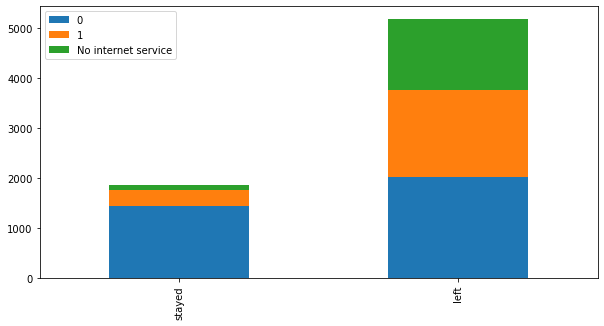

In [24]:
bar_chart('TechSupport')

##### Obviously if the company provided techsupport then the customers loved it and stayed with them 

The percentage is  0                      1869.0
1                      1894.0
No internet service    1414.0
Name: StreamingTV, dtype: float64


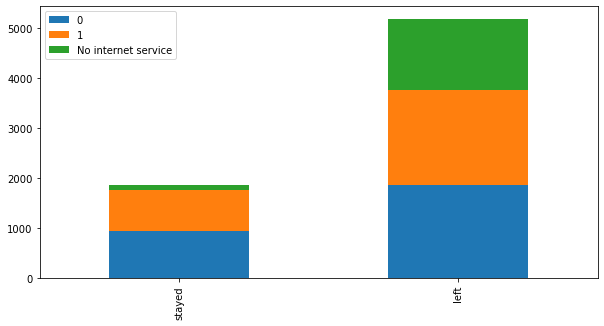

In [25]:
bar_chart('StreamingTV')

##### StreamingTV did not play a very important role in the decision of the customer but the internet service played. Customers preferred to have internet service

The percentage is  0                      1848.0
1                      1915.0
No internet service    1414.0
Name: StreamingMovies, dtype: float64


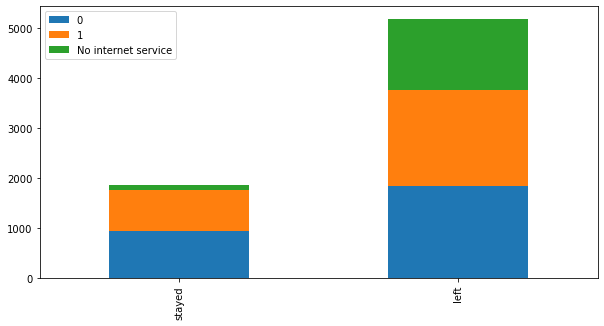

In [26]:
bar_chart('StreamingMovies')

##### The facility for streaming movie did not play a very important role for customer but the internet service played a huge role

The percentage is  Month-to-month    2221.0
One year          1308.0
Two year          1648.0
Name: Contract, dtype: float64


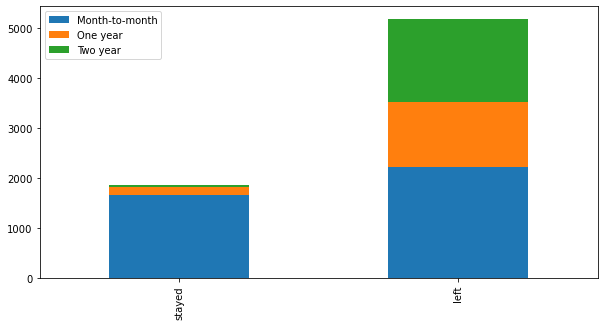

In [27]:
bar_chart('Contract')

##### Month to Month Contract is way more preferred by the customer than an year long or two year long one 

The percentage is  1    2772.0
0    2404.0
Name: PaperlessBilling, dtype: float64


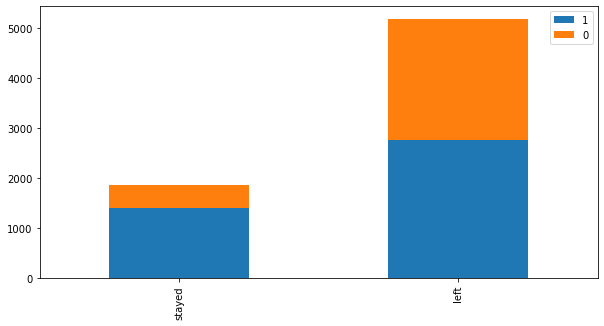

In [28]:
bar_chart('PaperlessBilling')

##### People liked paperless billing and had more tendency to stay than when billing was done with paper

The percentage is  Bank transfer (automatic)    1287.0
Credit card (automatic)      1291.0
Electronic check             1295.0
Mailed check                 1305.0
Name: PaymentMethod, dtype: float64


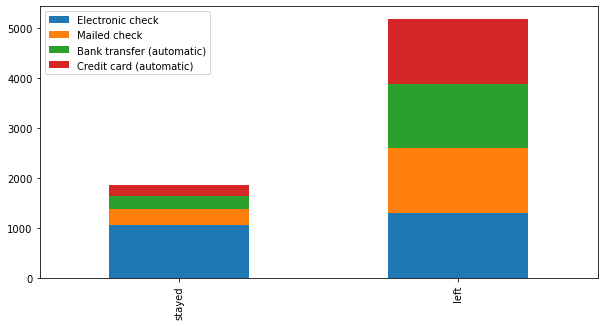

In [29]:
bar_chart('PaymentMethod')

##### This explains that the chrun is Yes if the mdoe of payment is Electronic check and huge number of people left when the payment method was credit card or bank transfer(automatic)

In [30]:
def range_feature(feature):
    R = max(data[feature]) - min(data[feature])
    print(R)

72


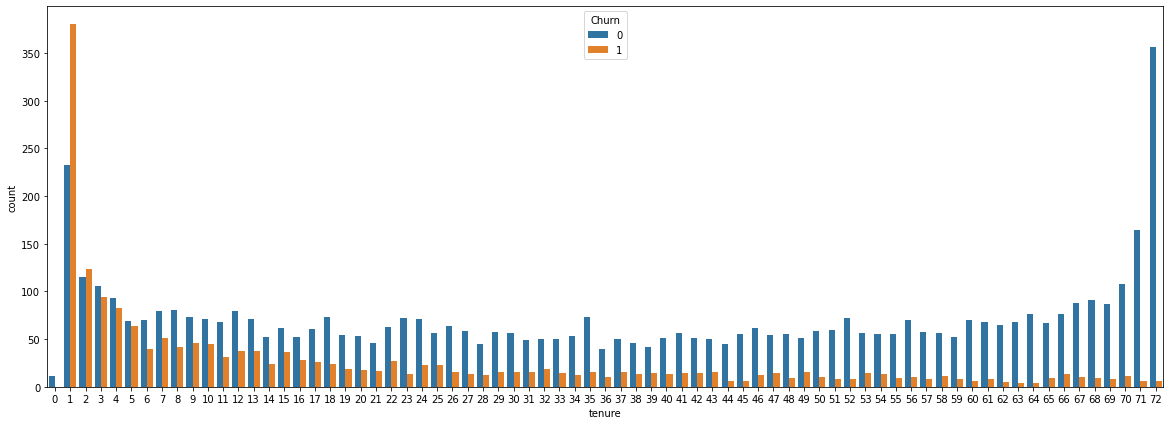

In [31]:
range_feature('tenure')
plt.subplots(figsize = (20,7))
sns.countplot('tenure',data = data,hue='Churn')

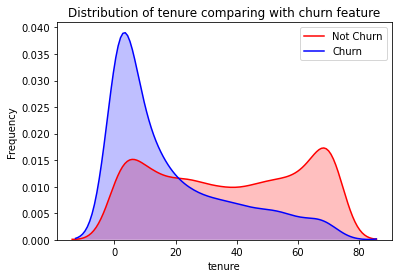

In [32]:
# tenure distibution 
g = sns.kdeplot(data.tenure[(data["Churn"] == '0') ], color="Red", shade = True)
g = sns.kdeplot(data.tenure[(data["Churn"] == '1') ], ax =g, color="Blue", shade= True)
g.set_xlabel("tenure")
g.set_ylabel("Frequency")
plt.title('Distribution of tenure comparing with churn feature')
g = g.legend(["Not Churn","Churn"])

##### This shows that when the tenure value is low around 1 and 2, more number of customers were staying, while as the tenure value grew higher less number of customer stayed. The optimum value for the tenure is 1. 

In [33]:
range_feature('MonthlyCharges')

100.5


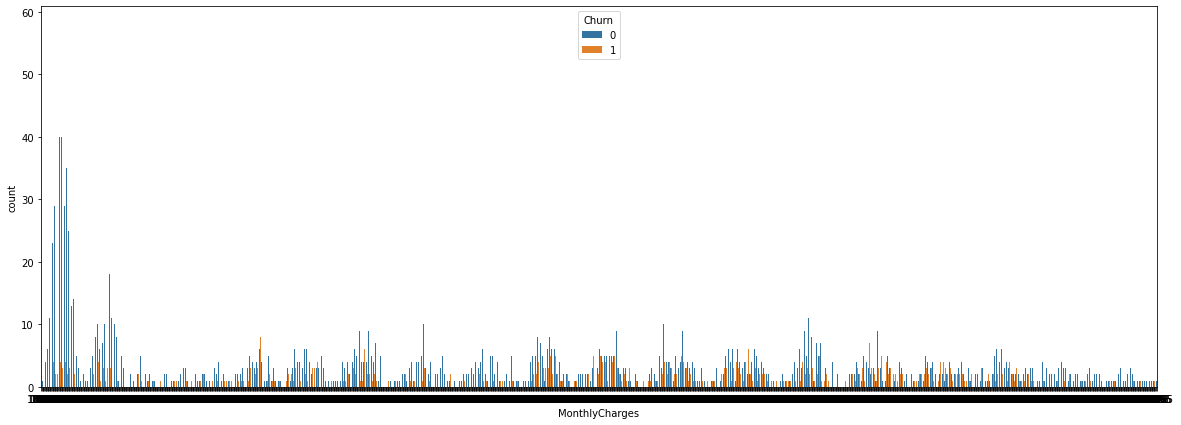

In [34]:
plt.subplots(figsize = (20,7))
sns.countplot('MonthlyCharges',data=data,hue='Churn')

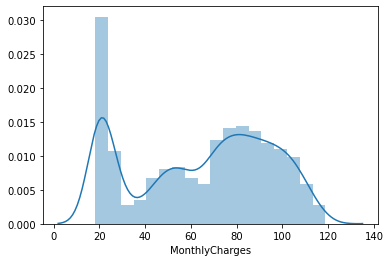

In [35]:
sns.distplot(data['MonthlyCharges'])

##### Maximum number of people paid a monthly charge of 20 or in the range of 70 to 100. 

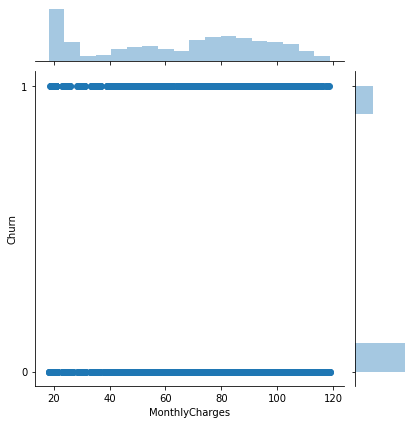

In [36]:
sns.jointplot(x= data['MonthlyCharges'],y = data['Churn'], data= data)

##### We can conclude that if the monthly charges and the total charges where on the lower many people stayed.

### Data preprocessing

##### Taking another look at the data

In [42]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


##### Creating dummies for the gender column

In [43]:
data = pd.get_dummies(data=data, columns=['gender'])
data.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male
0,7590-VHVEG,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1,0
1,5575-GNVDE,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,One year,No,Mailed check,56.95,1889.5,No,0,1
2,3668-QPYBK,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0,1
3,7795-CFOCW,0,No,No,45,No,No phone service,DSL,Yes,No,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0,1
4,9237-HQITU,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,0


##### Converting Yes and No values to 1 and 0 

In [44]:
data['Partner'] = data['Partner'].map(lambda s :1  if s =='Yes' else 0)
data['Partner'].value_counts()

0    3641
1    3402
Name: Partner, dtype: int64

In [45]:
data['Dependents'] = data['Dependents'].map(lambda s :1  if s =='Yes' else 0)
data['PhoneService'] = data['PhoneService'].map(lambda s :1  if s =='Yes' else 0)
data['PaperlessBilling'] = data['PaperlessBilling'].map(lambda s :1  if s =='Yes' else 0)

In [46]:
data['MultipleLines'].replace('No phone service','No', inplace=True)
data['MultipleLines'] = data['MultipleLines'].map(lambda s :1  if s =='Yes' else 0)
data['MultipleLines'].value_counts()

0    4072
1    2971
Name: MultipleLines, dtype: int64

In [47]:
data['Has_InternetService'] = data['InternetService'].map(lambda s :0  if s =='No' else 1)
data['Fiber_optic'] = data['InternetService'].map(lambda s :1  if s =='Fiber optic' else 0)
data['DSL'] = data['InternetService'].map(lambda s :1  if s =='DSL' else 0)

In [48]:
print(data['Has_InternetService'].value_counts())
print(data['Fiber_optic'].value_counts())
print(data['DSL'].value_counts())
data.drop(['InternetService'], axis=1, inplace=True)

1    5517
0    1526
Name: Has_InternetService, dtype: int64
0    3947
1    3096
Name: Fiber_optic, dtype: int64
0    4622
1    2421
Name: DSL, dtype: int64


In [49]:
data['OnlineSecurity'] = data['OnlineSecurity'].map(lambda s :1  if s =='Yes' else 0)
data['OnlineBackup'] = data['OnlineBackup'].map(lambda s :1  if s =='Yes' else 0)
data['DeviceProtection'] = data['DeviceProtection'].map(lambda s :1  if s =='Yes' else 0)
data['TechSupport'] = data['TechSupport'].map(lambda s :1  if s =='Yes' else 0)
data['StreamingTV'] = data['StreamingTV'].map(lambda s :1  if s =='Yes' else 0)
data['StreamingMovies'] = data['StreamingMovies'].map(lambda s :1  if s =='Yes' else 0)

In [50]:
data = pd.get_dummies(data=data, columns=['PaymentMethod'])

In [51]:
data[['PaymentMethod_Electronic check',
      'PaymentMethod_Mailed check',
      'PaymentMethod_Bank transfer (automatic)',
      'PaymentMethod_Credit card (automatic)']].head()

,PaymentMethod_Electronic check,PaymentMethod_Mailed check,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic)
0,1,0,0,0
1,0,1,0,0
2,0,1,0,0
3,0,0,1,0
4,1,0,0,0


In [52]:
data = pd.get_dummies(data=data, columns=['Contract'])

##### Cleaning and preprocessing on the totalcharges column

In [53]:
len(data[data['TotalCharges'] == " "])

11

In [54]:
data = data[data['TotalCharges'] != " "]

In [55]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 29 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               7032 non-null   object 
 1   SeniorCitizen                            7032 non-null   int64  
 2   Partner                                  7032 non-null   int64  
 3   Dependents                               7032 non-null   int64  
 4   tenure                                   7032 non-null   int64  
 5   PhoneService                             7032 non-null   int64  
 6   MultipleLines                            7032 non-null   int64  
 7   OnlineSecurity                           7032 non-null   int64  
 8   OnlineBackup                             7032 non-null   int64  
 9   DeviceProtection                         7032 non-null   int64  
 10  TechSupport                              7032 no

In [58]:
data.Churn.dtypes

dtype('O')

##### Getting rid of the customer ID column as it is of no importance to the model 

In [59]:

Y_train = data["Churn"]
X_train = data.drop(labels = ["Churn"],axis = 1)

In [60]:
Y_train

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7032, dtype: object

In [62]:
Y_train = Y_train.replace(to_replace = ['Yes','No'],value = [1,0])

In [63]:
Y_train

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

In [68]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               7032 non-null   object 
 1   SeniorCitizen                            7032 non-null   int64  
 2   Partner                                  7032 non-null   int64  
 3   Dependents                               7032 non-null   int64  
 4   tenure                                   7032 non-null   int64  
 5   PhoneService                             7032 non-null   int64  
 6   MultipleLines                            7032 non-null   int64  
 7   OnlineSecurity                           7032 non-null   int64  
 8   OnlineBackup                             7032 non-null   int64  
 9   DeviceProtection                         7032 non-null   int64  
 10  TechSupport                              7032 no

In [69]:
X_train.drop(['customerID'], axis=1, inplace=True)

In [64]:
data["Churn"] = data["Churn"].astype(int)


### Model Creation

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import  cross_val_score,GridSearchCV

Rfclf = RandomForestClassifier(random_state=15)
Rfclf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=15, verbose=0,
                       warm_start=False)

In [71]:
# 10 Folds Cross Validation 
clf_score = cross_val_score(Rfclf, X_train, Y_train, cv=10)
print(clf_score)
clf_score.mean()

[0.79829545 0.80539773 0.79374111 0.79516358 0.77809388 0.74964438
 0.80938834 0.79374111 0.80227596 0.80227596]


0.7928017506142506

##### So the model has an accuracy of 80 % using a random forest classifier and 10 fold cross validation. 

###### Sorry I did not have the time to apply the model to more number of algorithms and improve the accuracy which I could have.
###### Also I included the analysis and insights during the data visualization so not stating it here. 

## Thank you 